# VizKG

In [1]:
!pip install VizKG

In [1]:
import VizKG.visualize as vkg

According to VizKG analysis, the following visualizations can be displayed: ['BubbleChart', 'Table', 'Histogram', 'DensityPlot']
We show below two of them ('BubbleChart', 'DensityPlot') as illustrations: 


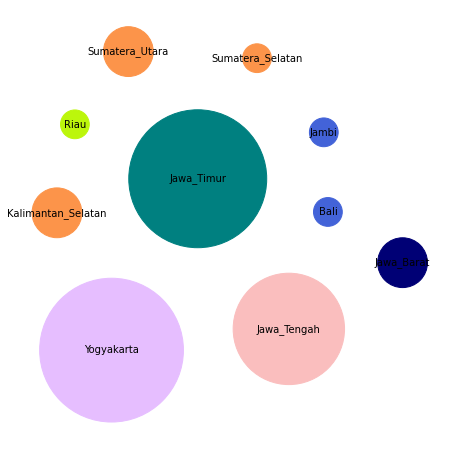

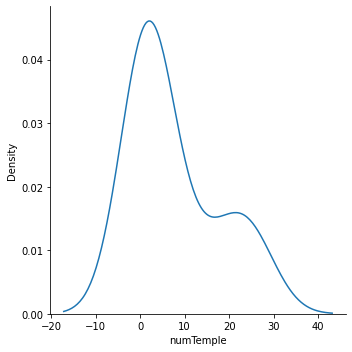

In [7]:
sparql_query = """
prefix bkb:   <https://budayakb.cs.ui.ac.id/ns#> 
prefix xsd:   <http://www.w3.org/2001/XMLSchema#> 
prefix bkbr:  <https://budayakb.cs.ui.ac.id/resource/> 

SELECT ?provLabel (COUNT(?temple) AS ?numTemple) WHERE {
  ?temple a bkb:Candi .
  ?temple bkb:locationInProvince ?prov .
  ?prov rdfs:label ?provLabel.
  FILTER (lang(?provLabel) = 'id')

} GROUP BY ?provLabel
ORDER BY DESC(?numTemple)
"""

sparql_endpoint = "http://localhost:3030/ds/query"

chart = vkg(sparql_query=sparql_query, sparql_service_url=sparql_endpoint)
chart.plot()

# RadarChart

In [5]:
sparql_query = """
SELECT ?personLabel ?numOfSpouses ?numOfChildren ?numOfAwards  WHERE {
  VALUES ?person {wd:Q76127 wd:Q29050}
  {
    {
      # number of spouses
      SELECT ?person (COUNT(?spouse) AS ?numOfSpouses) WHERE {
        VALUES ?person {wd:Q76127 wd:Q29050}
        ?person wdt:P26 ?spouse
      } GROUP BY ?person
    }
  }
  {
    {
      # number of children
      SELECT ?person (COUNT(?child) AS ?numOfChildren) WHERE {
        VALUES ?person {wd:Q76127 wd:Q29050}
        ?person wdt:P40 ?child
      } GROUP BY ?person
    }
  }
  {
    {
      # number of languages spoken
      SELECT ?person (COUNT(?language) AS ?numOfLanguages) WHERE {
        VALUES ?person {wd:Q76127 wd:Q29050}
        ?person wdt:P1412 ?language
      } GROUP BY ?person
    }
  }
  {
    {
      # number of awards received
      SELECT ?person (COUNT(?award) AS ?numOfAwards) WHERE {
        VALUES ?person {wd:Q76127 wd:Q29050}
        ?person wdt:P166 ?award
      } GROUP BY ?person
    }
  }
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}

"""

sparql_service_url = "https://query.wikidata.org/sparql"
chart = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='radar')
chart.plot()

# BubbleChart

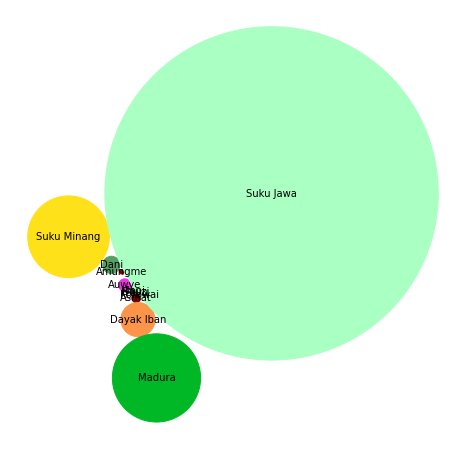

In [6]:
sparql_query = """
SELECT DISTINCT ?itemLabel ?population
WHERE
{
  ?item wdt:P31 wd:Q83828 ;
        wdt:P1082 ?population .
  SERVICE wikibase:label { bd:serviceParam wikibase:language "id" }
}ORDER BY ?population
"""

sparql_service_url = "https://query.wikidata.org/sparql"
bubble = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='BubbleChart')
bubble.plot()

# WordCloud

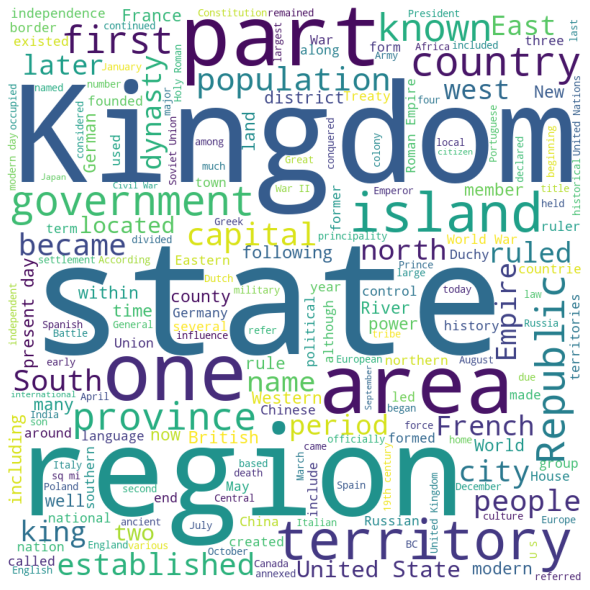

In [7]:
sparql_query = """
#Abstract of all countries
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX : <http://dbpedia.org/resource/>
PREFIX dbpedia2: <http://dbpedia.org/property/>
PREFIX dbpedia: <http://dbpedia.org/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT DISTINCT ?abstract
      WHERE { 
              ?x rdf:type dbo:Country;
                        dbo:abstract ?abstract.
              FILTER (lang(?abstract) = 'en')
}
"""
sparql_service_url = "http://dbpedia.org/sparql"
words = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='WordCloud')
words.plot()

# Treemaps, Sunburst

In [45]:
sparql_query = """
#Number of employees based on job title
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX schema: <http://schema.org/jobTitle>

SELECT DISTINCT ?jobTitle (COUNT(?jobTitle) as ?count)
WHERE {?s a foaf:Person .
?s <http://schema.org/jobTitle> ?jobTitle .
  FILTER (lang(?jobTitle) != 'en')

}
GROUP BY ?jobTitle
HAVING (?count > 10)
"""
sparql_service_url = "https://data.open.ac.uk/sparql"
tree = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='TreeMap')
tree.plot()

In [46]:
sparql_query = """
#Number of employees based on job title
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX schema: <http://schema.org/jobTitle>

SELECT DISTINCT ?jobTitle (COUNT(?jobTitle) as ?count)
WHERE {?s a foaf:Person .
?s <http://schema.org/jobTitle> ?jobTitle .
  FILTER (lang(?jobTitle) != 'en')

}
GROUP BY ?jobTitle
HAVING (?count > 10)
"""
sparql_service_url = "https://data.open.ac.uk/sparql"
sunburst = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='SunBurstChart')
sunburst.plot()

## two labels

In [11]:
sparql_query = """
#Number of people who has particular eyescolor and haircolor
SELECT ?eyes ?hairColorLabel (COUNT(?person) as ?count)
WHERE
{
        ?person wdt:P1340 ?eyeColor.
    ?person wdt:P1884 ?hairColor.
    ?person wdt:P2048 ?height.
    ?eyeColor rdfs:label ?_eyeColorLabel.
    FILTER((LANG(?_eyeColorLabel)) = "en")
    BIND(CONCAT(?_eyeColorLabel, " eyes") AS ?eyes)
        SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}

GROUP BY ?eyes ?hairColorLabel
ORDER BY DESC(?count)
    """
sparql_service_url = "https://query.wikidata.org/sparql"
treemap = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart="treemap")
treemap.plot()

In [17]:
sparql_query = """
#Number of people who has particular eyescolor and haircolor
SELECT ?eyes ?hairColorLabel (COUNT(?person) as ?count)
WHERE
{
    ?person wdt:P1340 ?eyeColor.
    ?person wdt:P1884 ?hairColor.
    ?person wdt:P2048 ?height.
    ?eyeColor rdfs:label ?_eyeColorLabel.
    FILTER((LANG(?_eyeColorLabel)) = "en")
    BIND(CONCAT(?_eyeColorLabel, " eyes") AS ?eyes)
    SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}

GROUP BY ?eyes ?hairColorLabel
ORDER BY DESC(?count)
LIMIT 20
"""
sparql_service_url = "https://query.wikidata.org/sparql"
treemap = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='TreeMap')
treemap.plot()

In [76]:
sparql_query = """
#Number of people who has particular eyescolor and haircolor
SELECT ?eyes ?hairColorLabel (COUNT(?person) as ?count)
WHERE
{
        ?person wdt:P1340 ?eyeColor.
    ?person wdt:P1884 ?hairColor.
    ?person wdt:P2048 ?height.
    ?eyeColor rdfs:label ?_eyeColorLabel.
    FILTER((LANG(?_eyeColorLabel)) = "en")
    BIND(CONCAT(?_eyeColorLabel, " eyes") AS ?eyes)
        SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}

GROUP BY ?eyes ?hairColorLabel
ORDER BY DESC(?count)
LIMIT 20
"""
sparql_service_url = "https://query.wikidata.org/sparql"
chart = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='SunBurstChart')
chart.plot()

# Tree

In [75]:
sparql_query = """
  #Properties of Indonesia (wd:Q252) grouped by their parent property
  SELECT DISTINCT ?property1 ?property1Label ?property2Label ?property2 WHERE {
    VALUES (?country) {(wd:Q252)}
    
    ?country ?property ?statement .
    ?property1 wikibase:directClaim ?property.
    ?property2 wdt:P1647 ?property1.

    SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],id, en". }

  }
    """
sparql_service_url = "https://query.wikidata.org/sparql"
tree = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='Tree')
tree.plot()

# Pie chart and donut

In [73]:
sparql_query = """
#Number of Computer Scientist in Indonesia
SELECT ?genderLabel (COUNT(?genderLabel) as ?count) WHERE {
  ?item wdt:P31 wd:Q5;
        wdt:P27 wd:Q252;
        wdt:P106 wd:Q82594;
        wdt:P21 ?gender.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
GROUP BY ?itemLabel ?genderLabel
"""
sparql_service_url = "https://query.wikidata.org/sparql"
chart = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='PieChart')
chart.plot()

In [74]:
chart = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='DonutChart')
chart.plot()

# Heatmap

In [7]:
sparql_query = """
# Correlation between 'area', 'elevation', 'num_ads_teritori', 'num_border_areas', and 'num_languages' of indonesia
SELECT ?itemLabel ?num_ads_teritorial ?num_border_areas ?num_languages  WHERE {
  {
    SELECT ?itemLabel ?area ?elevation WHERE {
      ?item wdt:P31 wd:Q5098;
            wdt:P706 ?island;
            wdt:P2046 ?area;
            wdt:P2044 ?elevation.
      SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
    }
  }
  {
    SELECT ?itemLabel (COUNT(?ads_teritorial) AS ?num_ads_teritorial ) WHERE {
      ?item wdt:P31 wd:Q5098;
            wdt:P150 ?ads_teritorial.
      SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
    }
    GROUP BY ?itemLabel
  }
  {
    SELECT ?itemLabel (COUNT(?border_area) AS ?num_border_areas ) WHERE {
      ?item wdt:P31 wd:Q5098;
            wdt:P47 ?border_area.
      SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
    }
    GROUP BY ?itemLabel
  }
  {
    SELECT ?itemLabel (COUNT(?language) AS ?num_languages ) WHERE {
      ?item wdt:P31 wd:Q5098;
            wdt:P2936 ?language.
      SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
    }
    GROUP BY ?itemLabel
  }

}
ORDER BY ?num_border_areas
LIMIT 5
    """
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "https://query.wikidata.org/sparql"
heatmap = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='heatmap')
heatmap.plot()

# AreaChart

In [71]:
sparql_query = """
#Population in the indonesia and malaysia
SELECT ?year ?popValue ?countryLabel {
  VALUES ?country { wd:Q252 wd:Q833 wd:Q183 }
  ?country p:P1082 ?popResource .
  ?popResource ps:P1082 ?popValue ;
                pq:P585 ?time .
  BIND(STR(YEAR(?time)) AS ?year)
  
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
    """
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "https://query.wikidata.org/sparql"
Area = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='AreaChart')
Area.plot()

#  Histogram, DensityPlot, BoxPlot, ViolinPlot

In [70]:
sparql_query = """
#Distribution of indonesian's mass based on gender
SELECT ?item ?mass ?genderLabel WHERE 
{
  ?item wdt:P31 wd:Q5;
        wdt:P27 wd:Q252;
        wdt:P21 ?gender.
  ?item p:P2067/psv:P2067 ?Mass.
  ?Mass wikibase:quantityAmount ?mass.
  ?Mass wikibase:quantityUnit wd:Q11570.
  ?gender rdfs:label ?genderLabel.
  FILTER((LANG(?genderLabel)) = "en")
}
"""
sparql_service_url = "https://query.wikidata.org/sparql"
chart = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='Histogram')
chart.plot()

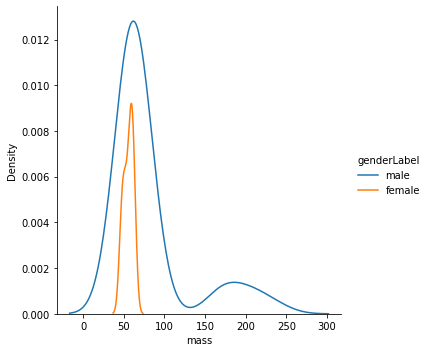

In [6]:
sparql_query = """
#Distribution of indonesian's mass based on gender
SELECT ?item ?mass ?genderLabel WHERE 
{
  ?item wdt:P31 wd:Q5;
        wdt:P27 wd:Q252;
        wdt:P21 ?gender.
  ?item p:P2067/psv:P2067 ?Mass.
  ?Mass wikibase:quantityAmount ?mass.
  ?Mass wikibase:quantityUnit wd:Q11570.
  ?gender rdfs:label ?genderLabel.
  FILTER((LANG(?genderLabel)) = "en")
}
"""
sparql_service_url = "https://query.wikidata.org/sparql"
chart = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='DensityPlot')
chart.plot()

In [68]:
sparql_query = """
#Distribution of indonesian's mass based on gender
SELECT ?item ?mass ?genderLabel WHERE 
{
  ?item wdt:P31 wd:Q5;
        wdt:P27 wd:Q252;
        wdt:P21 ?gender.
  ?item p:P2067/psv:P2067 ?Mass.
  ?Mass wikibase:quantityAmount ?mass.
  ?Mass wikibase:quantityUnit wd:Q11570.
  ?gender rdfs:label ?genderLabel.
  FILTER((LANG(?genderLabel)) = "en")
}
"""
sparql_service_url = "https://query.wikidata.org/sparql"
chart = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='BoxPlot')
chart.plot()

In [67]:
sparql_query = """
#Distribution of indonesian's mass based on gender
SELECT ?item ?mass ?genderLabel WHERE 
{
  ?item wdt:P31 wd:Q5;
        wdt:P27 wd:Q252;
        wdt:P21 ?gender.
  ?item p:P2067/psv:P2067 ?Mass.
  ?Mass wikibase:quantityAmount ?mass.
  ?Mass wikibase:quantityUnit wd:Q11570.
  ?gender rdfs:label ?genderLabel.
  FILTER((LANG(?genderLabel)) = "en")
}
"""
sparql_service_url = "https://query.wikidata.org/sparql"
chart = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='violin')
chart.plot()

## population of each province in indonesia

In [66]:
sparql_query = """
    #population of each province in indonesia
    SELECT DISTINCT ?itemLabel ?population
    WHERE
    {
      ?item wdt:P31 wd:Q5098;
            wdt:P1082 ?population .
      SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE]id,en" }
    }
    """
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "https://query.wikidata.org/sparql"
histo = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='histo')
histo.plot()

In [65]:
sparql_query = """
    #population of each province in indonesia
    SELECT DISTINCT ?itemLabel ?population
    WHERE
    {
      ?item wdt:P31 wd:Q5098;
            wdt:P1082 ?population .
      SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE]id,en" }
    }
    """
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "https://query.wikidata.org/sparql"
density = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='dnsty')
density.plot()

In [64]:
sparql_query ="""
#population of each province in indonesia
SELECT DISTINCT ?countryLabel ?population
WHERE
{
  VALUES ?country { wd:Q5098} #indonesia and vietnam
  ?item wdt:P31 ?country;
        wdt:P1082 ?population .
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en" }
}
"""
sparql_service_url = "https://query.wikidata.org/sparql"
histogram = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='boxplot')
histogram.plot()

In [63]:
sparql_query ="""
#population of each province in indonesia
SELECT DISTINCT ?countryLabel ?population
WHERE
{
  VALUES ?country { wd:Q5098} #indonesia and vietnam
  ?item wdt:P31 ?country;
        wdt:P1082 ?population .
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en" }
}
"""
sparql_service_url = "https://query.wikidata.org/sparql"
violin = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='violin')
violin.plot()

## 2 labels

In [62]:
sparql_query ="""
#population of each province in indonesia, thailand and vietnam
SELECT DISTINCT ?countryLabel ?population
WHERE
{
  VALUES ?country { wd:Q5098 wd:Q24746 wd:Q50198 } #indonesia and vietnam
  ?item wdt:P31 ?country;
        wdt:P1082 ?population .
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en" }
}
"""
sparql_service_url = "https://query.wikidata.org/sparql"
histogram = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='Histogram')
histogram.plot()

In [61]:
sparql_query ="""
#population of each province in indonesia, thailand and vietnam
SELECT DISTINCT ?countryLabel ?population
WHERE
{
  VALUES ?country { wd:Q5098 wd:Q24746 wd:Q50198 } #indonesia and vietnam
  ?item wdt:P31 ?country;
        wdt:P1082 ?population .
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en" }
}
"""
sparql_service_url = "https://query.wikidata.org/sparql"
density = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='DensityPlot')
density.plot()

In [60]:
sparql_query ="""
#population of each province in indonesia, thailand and vietnam
SELECT DISTINCT ?countryLabel ?population
WHERE
{
  VALUES ?country { wd:Q5098 wd:Q24746 wd:Q50198 } #indonesia and vietnam
  ?item wdt:P31 ?country;
        wdt:P1082 ?population .
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en" }
}
"""
sparql_service_url = "https://query.wikidata.org/sparql"
boxplot = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='BoxPlot')
boxplot.plot()

In [59]:
sparql_query ="""
#population of each province in indonesia, thailand and vietnam
SELECT DISTINCT ?countryLabel ?population
WHERE
{
  VALUES ?country { wd:Q5098 wd:Q24746 wd:Q50198 } #indonesia and vietnam
  ?item wdt:P31 ?country;
        wdt:P1082 ?population .
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en" }
}
"""
sparql_service_url = "https://query.wikidata.org/sparql"
violin = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='ViolinPlot')
violin.plot()

# StackedArea

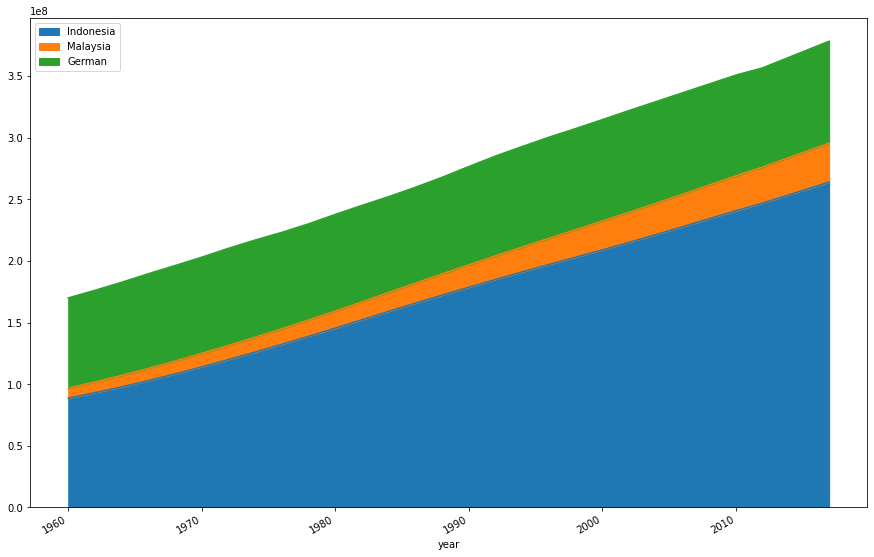

In [29]:
sparql_query = """
#Population growth in Indonesia, Malaysia and German
SELECT DISTINCT ?year ?Indonesia ?Malaysia ?German WHERE {
  {
    SELECT DISTINCT ?year ?Indonesia WHERE {
      wd:Q252 p:P1082 ?popResource .
      ?popResource ps:P1082 ?Indonesia ;
                   pq:P585 ?time .
      BIND((YEAR(?time)) AS ?year)
      #FILTER (?year < 2010)
      SERVICE wikibase:label { bd:serviceParam wikibase:language "id". }
    }
  }
  {
    SELECT DISTINCT ?year ?Malaysia WHERE {
      wd:Q833 p:P1082 ?popResource .
      ?popResource ps:P1082 ?Malaysia ;
                   pq:P585 ?time .
      BIND((YEAR(?time)) AS ?year)
      #FILTER (?year < 2010)
      SERVICE wikibase:label { bd:serviceParam wikibase:language "id". }
    }
  }
  {
    SELECT DISTINCT ?year ?German WHERE {
      wd:Q183 p:P1082 ?popResource .
      ?popResource ps:P1082 ?German  ;
                   pq:P585 ?time .
      BIND((YEAR(?time)) AS ?year)
      #FILTER (?year < 2010)
      SERVICE wikibase:label { bd:serviceParam wikibase:language "id". }
    }
  }
  
}
ORDER BY DESC (?year)

    """
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "https://query.wikidata.org/sparql"
stackedarea = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='StackedAreaChart')
stackedarea.plot()

# LineChart

In [58]:
sparql_query = """
#Population growth in Suriname from 1960 onward
SELECT ?year ?population {
  wd:Q730 p:P1082 ?p .
  ?p pq:P585 ?year ;
     ps:P1082 ?population .
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en" }
}
ORDER BY ?year
"""
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "https://query.wikidata.org/sparql"
line = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='LineChart')
line.plot()

In [57]:
sparql_query = """
#Population growth in Indonesia and Malaysia
SELECT ?year ?popValue ?countryLabel {
  VALUES ?country { wd:Q252 wd:Q833 }
  ?country p:P1082 ?popResource .
  ?popResource ps:P1082 ?popValue ;
                pq:P585 ?time .
  BIND(STR(YEAR(?time)) AS ?year)
  
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
"""
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "https://query.wikidata.org/sparql"
line = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='LineChart')
line.plot()

# ScatterChart

In [56]:
sparql_query = """
#number of languages and area in each of ASEAN country
SELECT ?area ?languages ?countryLabel WHERE {
  {
    SELECT DISTINCT ?country ?countryLabel ?area WHERE {
      ?country wdt:P463 wd:Q7768;
                wdt:P2046 ?area.
      SERVICE wikibase:label { bd:serviceParam wikibase:language "id". }
    }
    GROUP BY ?country ?countryLabel ?area
  }
  {
    SELECT DISTINCT ?country ?countryLabel (COUNT(?language) AS ?languages) WHERE {
      ?country wdt:P463 wd:Q7768;
                wdt:P2936 ?language.
      SERVICE wikibase:label { bd:serviceParam wikibase:language "id". }
    }
    GROUP BY ?country ?countryLabel ?languages
  }
}
    """
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "https://query.wikidata.org/sparql"
scatter = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='ScatterChart')
scatter.plot()

# BarChart

In [15]:
sparql_query = """
#population of each province in indonesia
SELECT DISTINCT ?itemLabel ?population
WHERE
{
  ?item wdt:P31 wd:Q5098;
        wdt:P1082 ?population .
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE]id,en" }
}
LIMIT 5
"""
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "https://query.wikidata.org/sparql"
bar = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='BarChart')
bar.plot()

# Stacked Bar Chart

In [53]:
sparql_query = """
#Top number of member in each Indonesia political party
SELECT DISTINCT ?political_partyLabel ?genderLabel (COUNT(?item) AS ?number_of_member)
WHERE
{
  ?item wdt:P31 wd:Q5;
        wdt:P27 wd:Q252;
        wdt:P102 ?political_party;
        wdt:P21 ?gender.
  ?political_party wdt:P571 ?inceptionDate.
  FILTER (YEAR(?inceptionDate) > 1960)
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],id" }
}
GROUP BY ?political_party ?political_partyLabel ?genderLabel
HAVING (?number_of_member >= 10)
ORDER BY DESC (?number_of_member)
    """
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "https://query.wikidata.org/sparql"
chart = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='BarChart')
chart.plot()

# Dimension

In [52]:
sparql_query = """
#Gender and ethnic distribution in the National Hero of Indonesia
SELECT ?genderLabel ?nameLabel ?ethnicLabel WHERE {
  ?name wdt:P166 wd:Q1369309;
        wdt:P21 ?gender;
        wdt:P172 ?ethnic .
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],id". }
}
"""
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "https://query.wikidata.org/sparql"
chart = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='Dimensions')
chart.plot()

# Timeline

In [51]:
sparql_query = """
#Birth date of president of indonesia 
SELECT ?bornDate ?person ?personLabel 
WHERE
{
  ?person wdt:P31 wd:Q5;
          wdt:P39 wd:Q11755916;
          wdt:P569 ?bornDate.
  OPTIONAL { ?person wdt:P570 ?deathDate }
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
ORDER BY ?date
"""
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "https://query.wikidata.org/sparql"
timeline = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart="Timeline")
timeline.plot()

# Graph

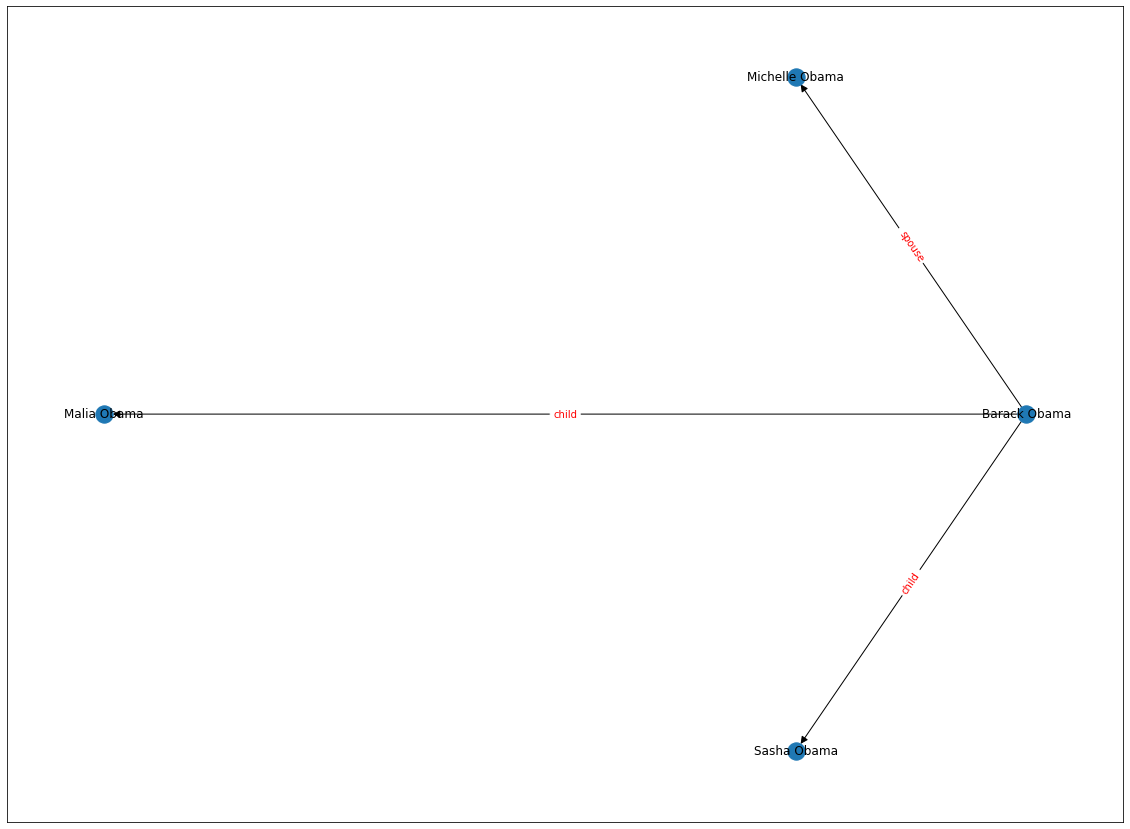

In [4]:
sparql_query = """
SELECT ?item ?linkTo ?prop (?itemLabel AS ?source_node) (?linkToLabel AS ?target_node)  (?propLabel AS ?edge_label)
WHERE
{
  BIND(wd:Q76 AS ?item)
  VALUES ?prop { wdt:P26 wdt:P40 }
  ?item ?prop ?linkTo .
  ?item rdfs:label ?itemLabel .
  ?linkTo rdfs:label ?linkToLabel .
  ?propFull wikibase:directClaim ?prop .
  ?propFull rdfs:label ?propLabel .
  FILTER(LANG(?itemLabel)="en")
  FILTER(LANG(?linkToLabel)="en")
  FILTER(LANG(?propLabel)="en")
}
    """
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "https://query.wikidata.org/sparql"
graph = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='Graph')
graph.plot()

In [14]:
sparql_query = """
SELECT ?item ?linkTo ?prop ?itemLabel ?linkToLabel  ?propLabel
WHERE
{
  BIND(wd:Q76 AS ?item)
  VALUES ?prop { wdt:P26 wdt:P40 }
  ?item ?prop ?linkTo .
  ?item rdfs:label ?itemLabel .
  ?linkTo rdfs:label ?linkToLabel .
  ?propFull wikibase:directClaim ?prop .
  ?propFull rdfs:label ?propLabel .
  FILTER(LANG(?itemLabel)="en")
  FILTER(LANG(?linkToLabel)="en")
  FILTER(LANG(?propLabel)="en")
}
    """
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "https://query.wikidata.org/sparql"
graph = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='Graph', figsize=(100,50))
graph.plot()

# Map

In [8]:
sparql_query = """
#added 2017-08
#Map of hospitals
SELECT * WHERE {
  ?item wdt:P31/wdt:P279* wd:Q16917;
        wdt:P625 ?point .
  ?item rdfs:label ?itemLabel.
  
  FILTER (lang(?itemLabel) = 'en')
}
LIMIT 1000
    """
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "https://query.wikidata.org/sparql"
map_ = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart="map")
map_.plot()

# imageGrid

In [16]:
sparql_query = """
#images of cat
SELECT ?item ?itemLabel ?pic
WHERE
{
?item wdt:P31 wd:Q146 .
?item wdt:P18 ?pic
SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en" }
}
LIMIT 16
"""
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "https://query.wikidata.org/sparql"
img = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='ImageGrid')
img.plot()

# No result data

In [43]:
sparql_query = """
#Kandidaten voor de Nederlandse TK verkiezingen van 2017
SELECT ?positie_op_lijst ?genderLabel ?occupationLabel ?politieke_partijLabel WHERE {
  VALUES ?politieke_partij {wd:Q747910 wd:Q275441}
  ?item p:P3602 ?node.
  ?item wdt:P21 ?gender.
  ?item wdt:P106 ?occupation.
  ?node ps:P3602 wd:Q16061881.
  ?node pq:P1545 ?positie_op_lijst.
  ?node pq:P1268 ?politieke_partij.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],nl". }
}
    """
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "https://query.wikidata.org/sparql"
chart = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='tabel')
chart.plot()

No matching records found
